## Installing and importing OpenCV

In [2]:
# Install using ' conda install -c conda-forge opencv ' on anaconda

import cv2

print (cv2.__version__) # no error show, we are good to go!

3.3.0


In [8]:
import common #some useful opencv functions (can be found in OpenCV samples folder)
import video # some video stuff (can be found in OpenCV samples folder)
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

Exploring the image

In [9]:
input_image=cv2.imread('D:\Projects\Playing with OpenCV\istanbulgerrard.jpg')

print('Image size is {}' .format(input_image.size))
print('Image shape is {}' .format(input_image.shape))
print('Image datatype is {}' .format(input_image.dtype))

Image size is 3421224
Image shape is (846, 1348, 3)
Image datatype is uint8


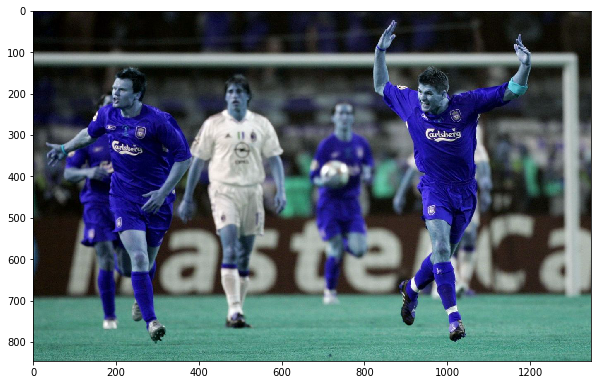

In [20]:
# Let's check out the image

plt.imshow(input_image)

#### Oh! it's Stevie G!

Color is screwed up coz OpenCV doesn't store images in RGB format, but in BGR format.

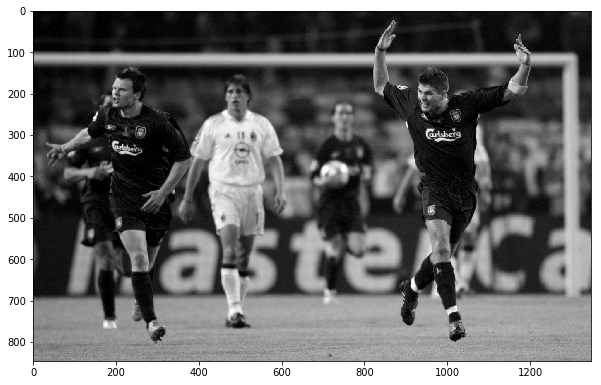

In [23]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels
plt.imshow(g, cmap='gray')

## converting between colour spaces, merging and splitting channels


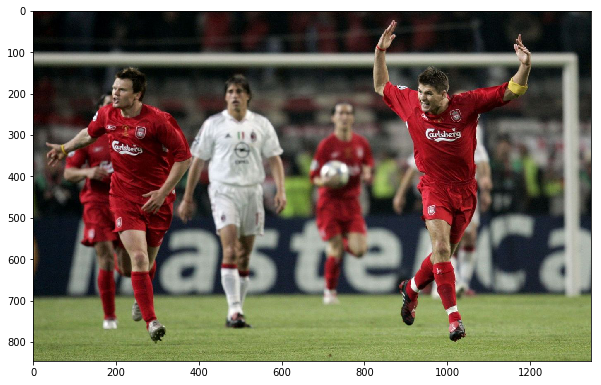

In [24]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)

## Getting image data and setting image data

In [28]:
pixel = input_image[100,100]
print(pixel)

[46 43 38]


In [30]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print (pixelnew)

[0 0 0]


## Getting and setting regions of an image

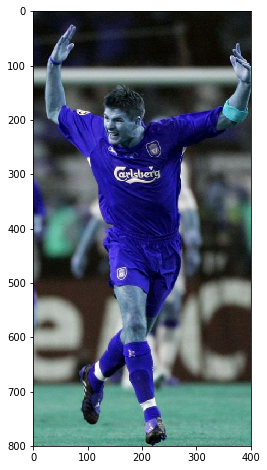

In [10]:
# Let's try to get Stevie G from the image
sg7 = input_image[0:800, 800:1200]

## The key thing to note here is that the slicing works like
##  [top_y:bottom_y, left_x:right_x]
plt.imshow(sg7)

800
400


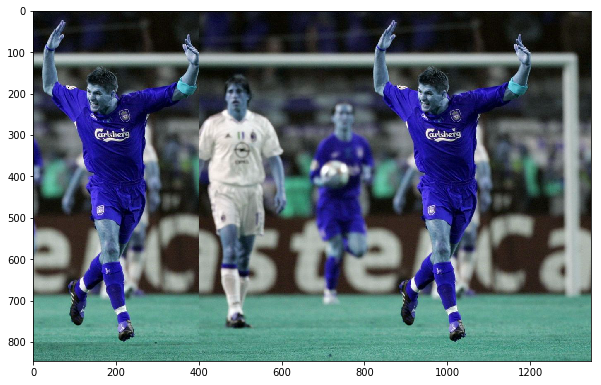

In [48]:
newimage = cv2.imread('D:/Projects/Playing with OpenCV/newimage.jpg')

# Superimpose cropped image on the real image
newimage[0:0+sg7.shape[0], 0:0+sg7.shape[1]] = sg7

print(sg7.shape[0])
print(sg7.shape[1])
plt.imshow(newimage)

Flip it!

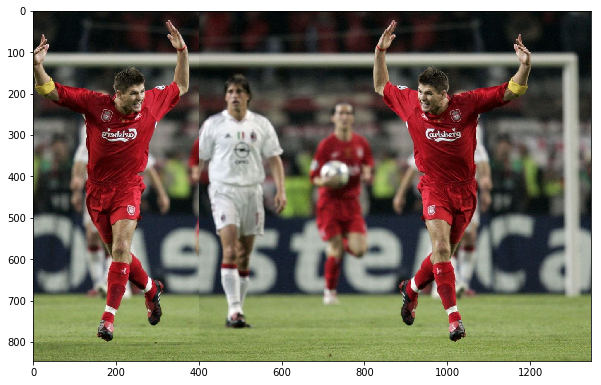

In [18]:
newimage = cv2.imread('D:/Projects/Playing with OpenCV/newimage.jpg')

# Superimpose cropped image on the real image
newimage[0:0+sg7.shape[0], 0:0+sg7.shape[1]] = cv2.flip(sg7,1)

plt.imshow(cv2.cvtColor(newimage, cv2.COLOR_BGR2RGB))

## Edge Detection
### Sobel Edge

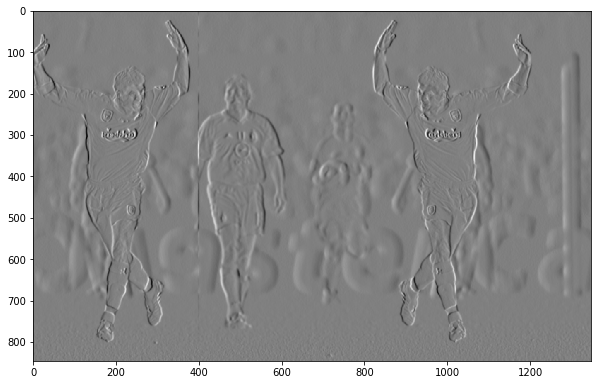

In [28]:
edgegray=cv2.cvtColor(newimage,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(edgegray,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(edgegray,cv2.CV_64F,0,1,ksize=7)
plt.imshow(sobelx,cmap = 'gray') 


### Canny Edge

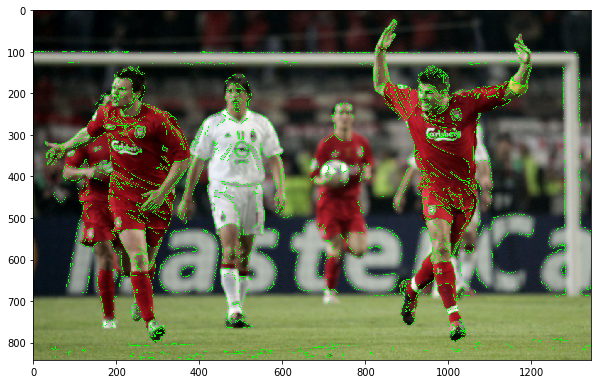

In [34]:
th1=35
th2=90 # Canny recommends threshold 2 is 3 times threshold 1
d=2 # gaussian blur

edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

## Features in computer vision

### Conrner Detection

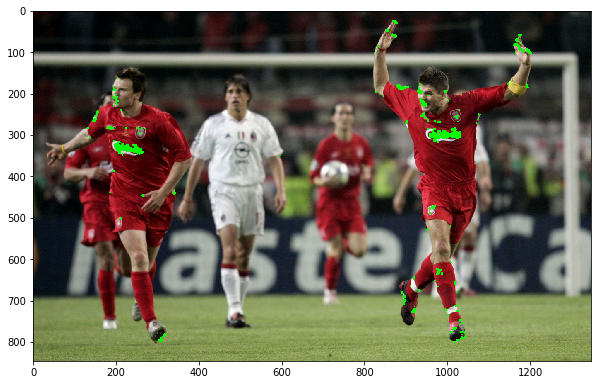

In [38]:
corner_img=input_image.copy()
#greyscale it
gray = cv2.cvtColor(corner_img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
blocksize=4 # 
kernel_size=3 # sobel kernel: must be odd and fairly small

# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold

#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
corner_img[dst>0.01*dst.max()]=[0,255,0]
plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))

Some of the very famous feature detectors (SIFT/SURF and so on) are around, but aren't in OpenCV, we're only going to look at those which are actually in OpenCV.

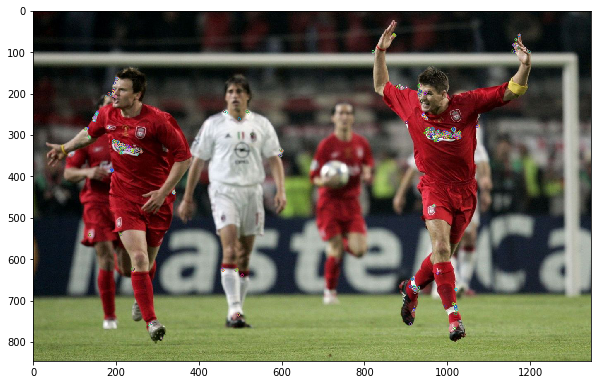

In [40]:
orbimg=input_image.copy()

orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(orbimg,None)
# compute the descriptors with ORB
kp, des = orb.compute(orbimg, kp)
# draw keypoints
cv2.drawKeypoints(orbimg,kp,orbimg)

plt.imshow(cv2.cvtColor(orbimg, cv2.COLOR_BGR2RGB))


### Match the features

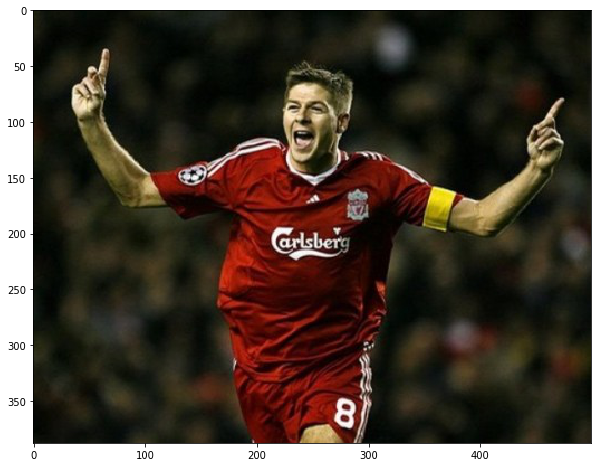

In [46]:
img2match = cv2.imread('D:/Projects/Playing with OpenCV/img2match.jpg')
#img2match=np.zeros(img2match.shape,np.uint8)
#dogface=input_image[60:250, 70:350] # copy out a bit
#img2match[60:250,70:350]=[0,0,0] # blank that region
#dogface=cv2.flip(dogface,0) #flip the copy
#img2match[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface # paste it back somewhere else
plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

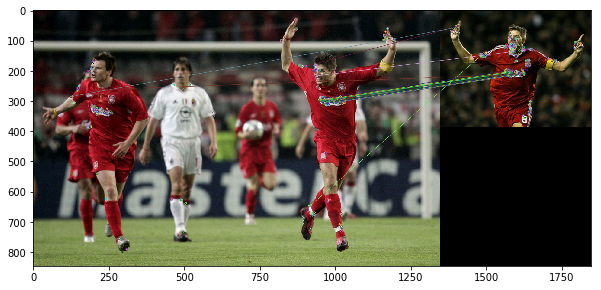

In [49]:
kp2 = orb.detect(img2match,None)
# compute the descriptors with ORB
kp2, des2 = orb.compute(img2match, kp2)
# create BFMatcher object: this is a Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,des2)
 
# Sort them by distance between matches in feature space - so the best matches are first.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 200 matches.
oimg = cv2.drawMatches(orbimg,kp,img2match,kp2,matches[:20], orbimg)
 
plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))